In [1]:
import os
import shutil
import numpy as np
import random
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Organizing the dataset
# These paths will be used ahead
root_path = '/kaggle/input/fresh-and-stale-classification/dataset'
output_path = '/kaggle/working'  

2024-07-13 17:32:02.693624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 17:32:02.693793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 17:32:02.817873: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
for x in ['Train', 'Test']:
    path = os.path.join(root_path, x)
    content = os.listdir(path)
    os.makedirs(os.path.join(output_path, x, '2Fresh'), exist_ok=True)
    os.makedirs(os.path.join(output_path, x, '1Rotten'), exist_ok=True)
    for sub_dir in tqdm(content):
        sub_dir_path = os.path.join(path, sub_dir)
        if os.path.isdir(sub_dir_path):
            image_paths = os.listdir(sub_dir_path)
            for image in image_paths:
                source = os.path.join(sub_dir_path, image)
                if sub_dir[0] == 'f':
                    destination = os.path.join(output_path, x, '2Fresh', image)
                elif sub_dir[0] == 'r':
                    destination = os.path.join(output_path, x, '1Rotten', image)
                shutil.copy(source, destination)

100%|██████████| 14/14 [00:39<00:00,  2.83s/it]


In [3]:
# Here we are creating ImageDataGenerator instances
generator = ImageDataGenerator(rescale=1/255.)

# Creating train and test generators
# Train generator is given the path till Train
train_generator = generator.flow_from_directory(
    os.path.join(output_path, 'Train'),
    target_size=(256, 256), 
    batch_size=32,
    class_mode='binary'
)
# Test generator is given the path till Test
test_generator = generator.flow_from_directory(
    os.path.join(output_path, 'Test'),
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 23619 images belonging to 2 classes.
Found 6738 images belonging to 2 classes.


In [4]:
test_generator.class_indices


{'1Rotten': 0, '2Fresh': 1}

In [5]:

# Defining our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,764,545 (60.14 MB)

 Trainable params: 15,764,545 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(train_generator,
                    epochs=15,  
                    validation_data=test_generator)

# Evaluating the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

#Model achieves about 98% accuracy


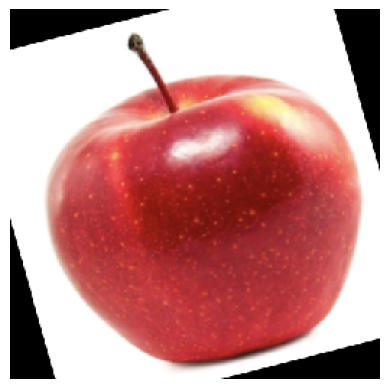

2024-07-13 17:42:34.513427: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387127: 5.77154, expected 5.03187
2024-07-13 17:42:34.513494: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387168: 6.05753, expected 5.31786
2024-07-13 17:42:34.513504: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387274: 5.79451, expected 5.05483
2024-07-13 17:42:34.513512: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387303: 6.3865, expected 5.64683
2024-07-13 17:42:34.513520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387310: 6.3852, expected 5.64553
2024-07-13 17:42:34.513528: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387370: 6.37416, expected 5.63449
2024-07-13 17:42:34.513536: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 387381: 4.72788, expected 3.98821
2024-07-13 17:42:34.51

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Our model predicts it is: fresh


In [8]:
# Display a random image from the test set and make a prediction
import matplotlib.pyplot as plt
import numpy as np
idx = random.randint(0, len(test_generator)-1)
batch = test_generator[idx]
X_test_batch, Y_test_batch = batch

plt.imshow(X_test_batch[0])
plt.axis('off')
plt.show()

# Prediction done on the image
y_pred = model.predict(X_test_batch[0].reshape(1, 256, 256, 3))
predicted_class = np.where((y_pred) >= 0.5,1,0)


if predicted_class == 1:
    pred = 'fresh'
else:
    pred = 'rotten'

print("Our model predicts it is:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


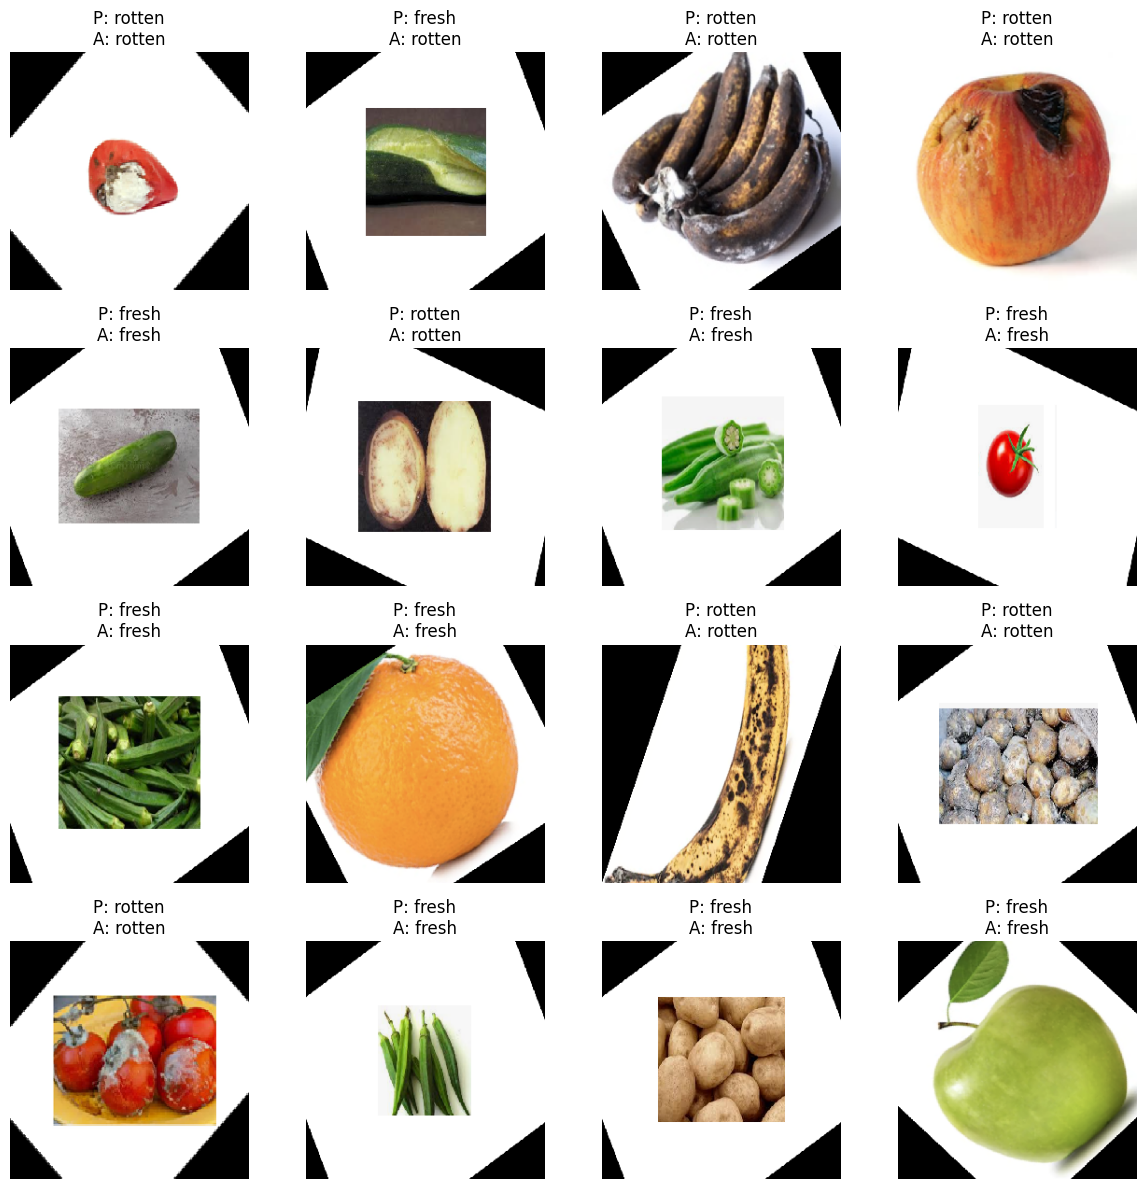

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 1: Predicted as rotten, Actual: rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 2: Predicted as fresh, Actual: rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 3: Predicted as rotten, Actual: rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 4: Predicted as rotten, Actual: rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 5: Predicted as fresh, Actual: fresh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 6: Predicted as rotten, Actual: rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 7: Predicted as fresh, Actual: fresh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 8: Predicted as fresh, Actual: fresh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 9: Predicted as fresh, Actual: fresh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 10: Predicted as fresh, Actual: fresh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 11: Predicted as rotten, Actual: rotten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 12: Predicted as rotten, Actual: rotten
1/1 ━━━━━━━━

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

num_images = 16

# Here we retreive a batch of data for actual vs predicted comparison
batch = next(test_generator)
X_test_batch, Y_test_batch = batch

# If the batch size is smaller than num_images, then adjust it accordingly
num_images = min(num_images, len(X_test_batch))

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i in range(num_images):
    # For displaying image
    ax = axes[i // 4, i % 4]
    ax.imshow(X_test_batch[i])
    ax.axis('off')
    
    # Prediction on the image
    y_pred = model.predict(X_test_batch[i].reshape(1, 256, 256, 3))
    predicted_class = np.where((y_pred) >= 0.5, 1, 0)
    
    # Map predicted class to label
    if predicted_class == 1:
        pred = 'fresh'
    else:
        pred = 'rotten'
    actual_class = int(Y_test_batch[i])  # Assuming Y_test_batch is one-hot encoded
    if actual_class == 1:
        actual = 'fresh'
    else:
        actual = 'rotten'
    ax.set_title(f"P: {pred}\nA: {actual}")

plt.tight_layout()
plt.show()

# Printing the predictions and actual labels for each displayed image
for i in range(num_images):
    y_pred = model.predict(X_test_batch[i].reshape(1, 256, 256, 3))
    predicted_class = np.where((y_pred) >= 0.5, 1, 0)
    
    if predicted_class == 1:
        pred = 'fresh'
    else:
        pred = 'rotten'
    
    actual_class = int(Y_test_batch[i])  # Assuming Y_test_batch is one-hot encoded
    
    if actual_class == 1:
        actual = 'fresh'
    else:
        actual = 'rotten'
    
    print(f"Image {i + 1}: Predicted as {pred}, Actual: {actual}")



In [12]:
model.save('/kaggle/working/Trained_BC.keras')